# **Car Price Prediction**

I will perform a simple analysis and create a model for car price dataset. The dataset was originally sourced from Kaggle, although the specific link is not currently available.

## **A. Import Library**

First, we need to import necessaries library.

In [ ]:
import pickle as pkl
import os

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

pd.options.mode.copy_on_write = True

We will compare performance in some model to this data.

## **B. Data Wrangling**

Data wrangling is a process to gather, first analysis, and do a simple preprocessing to the data. It usually the first step to analysis the data.

### **1. Gathering Data**

First we need to get the data from csv file. It should be in `./datasets` folder.

In [ ]:
df = pd.read_csv('datasets/car-price.csv')
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


This dataset has 10,000 rows, quite a lot.

### **2. Assessing Data**

Assessing data is perform a quick analysis to the data.

In [ ]:
df.shape

(10000, 10)

It has **10,000 rows** and **10 columns**.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


- The **lowest** `Price` for a car is `2,000`.
- The **minimum** `Year` for a car is `2000`, and the **maximum** is `2023`.

In [ ]:
df.describe(include='object')

,Brand,Model,Fuel_Type,Transmission
count,10000,10000,10000,10000
unique,10,30,4,3
top,Ford,Accord,Electric,Manual
freq,1048,365,2625,3372


In [ ]:
df.groupby('Brand').Model.unique()

,Model
Brand,
Audi,"[Q5, A3, A4]"
BMW,"[5 Series, 3 Series, X5]"
Chevrolet,"[Malibu, Equinox, Impala]"
Ford,"[Explorer, Fiesta, Focus]"
Honda,"[Civic, CR-V, Accord]"
Hyundai,"[Elantra, Tucson, Sonata]"
Kia,"[Rio, Sportage, Optima]"
Mercedes,"[GLA, E-Class, C-Class]"
Toyota,"[Camry, RAV4, Corolla]"


`Brand` has **10 type** and `Model` has **30 type**. Each `Brand` type should has 3 type of `Model`.

In [ ]:
df.Fuel_Type.unique()

array(['Diesel', 'Hybrid', 'Electric', 'Petrol'], dtype=object)

In [ ]:
df.Transmission.unique()

array(['Manual', 'Automatic', 'Semi-Automatic'], dtype=object)

- `Fuel_Type` has **4 type**: `Diesel`, `Hybrid`, `Electric`, `Petrol`.
- `Transmission` has **3 type**: `Manual`, `Automatic`, `Semi-Automatic`.

In [10]:
df.isna().sum()

,0
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0
Price,0


**No missing** value.

In [ ]:
df.duplicated().sum()

np.int64(0)

**No duplicated** value.

**Insight**:
- Has **10,000 rows** and **10 columns**.
- The **lowest** `Price` for a car is `2,000`.
- The **minimum** `Year` for a car is `2000`, and the **maximum** is `2023`.
- `Brand` has **10 type** and `Model` has **30 type**. Each `Brand` type should has 3 type of `Model`.
- `Fuel_Type` has **4 type**: `Diesel`, `Hybrid`, `Electric`, `Petrol`.
- `Transmission` has **3 type**: `Manual`, `Automatic`, `Semi-Automatic`.
- **No missing** value.
- **No duplicated** value.
- All columns and categorical value **used snake case**.

### **3. Cleaning Data**

We will perform first preprocessing, just a simple preprocessing that rename all columns name into lower case.

In [ ]:
df = df.rename(lambda x: x.lower(), axis='columns')
df

,brand,model,year,engine_size,fuel_type,transmission,mileage,doors,owner_count,price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


And also rename all columns value into lower case.

In [ ]:
object_cols = df.select_dtypes(include='object').columns
object_cols

Index(['brand', 'model', 'fuel_type', 'transmission'], dtype='object')

In [ ]:
df[object_cols] = df[object_cols].map(lambda val: val.lower())
df

,brand,model,year,engine_size,fuel_type,transmission,mileage,doors,owner_count,price
0,kia,rio,2020,4.2,diesel,manual,289944,3,5,8501
1,chevrolet,malibu,2012,2.0,hybrid,automatic,5356,2,3,12092
2,mercedes,gla,2020,4.2,diesel,automatic,231440,4,2,11171
3,audi,q5,2023,2.0,electric,manual,160971,2,1,11780
4,volkswagen,golf,2003,2.6,hybrid,semi-automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,kia,optima,2004,3.7,diesel,semi-automatic,5794,2,4,8884
9996,chevrolet,impala,2002,1.4,electric,automatic,168000,2,1,6240
9997,bmw,3 series,2010,3.0,petrol,automatic,86664,5,1,9866
9998,ford,explorer,2002,1.4,hybrid,automatic,225772,4,1,4084


## **C. Exploratory Data Analysis (EDA)**

EDA has a purpose to get important information about the dataset.

### **1. Visualizing**

We will perform deep analysis to this dataset with visualization.

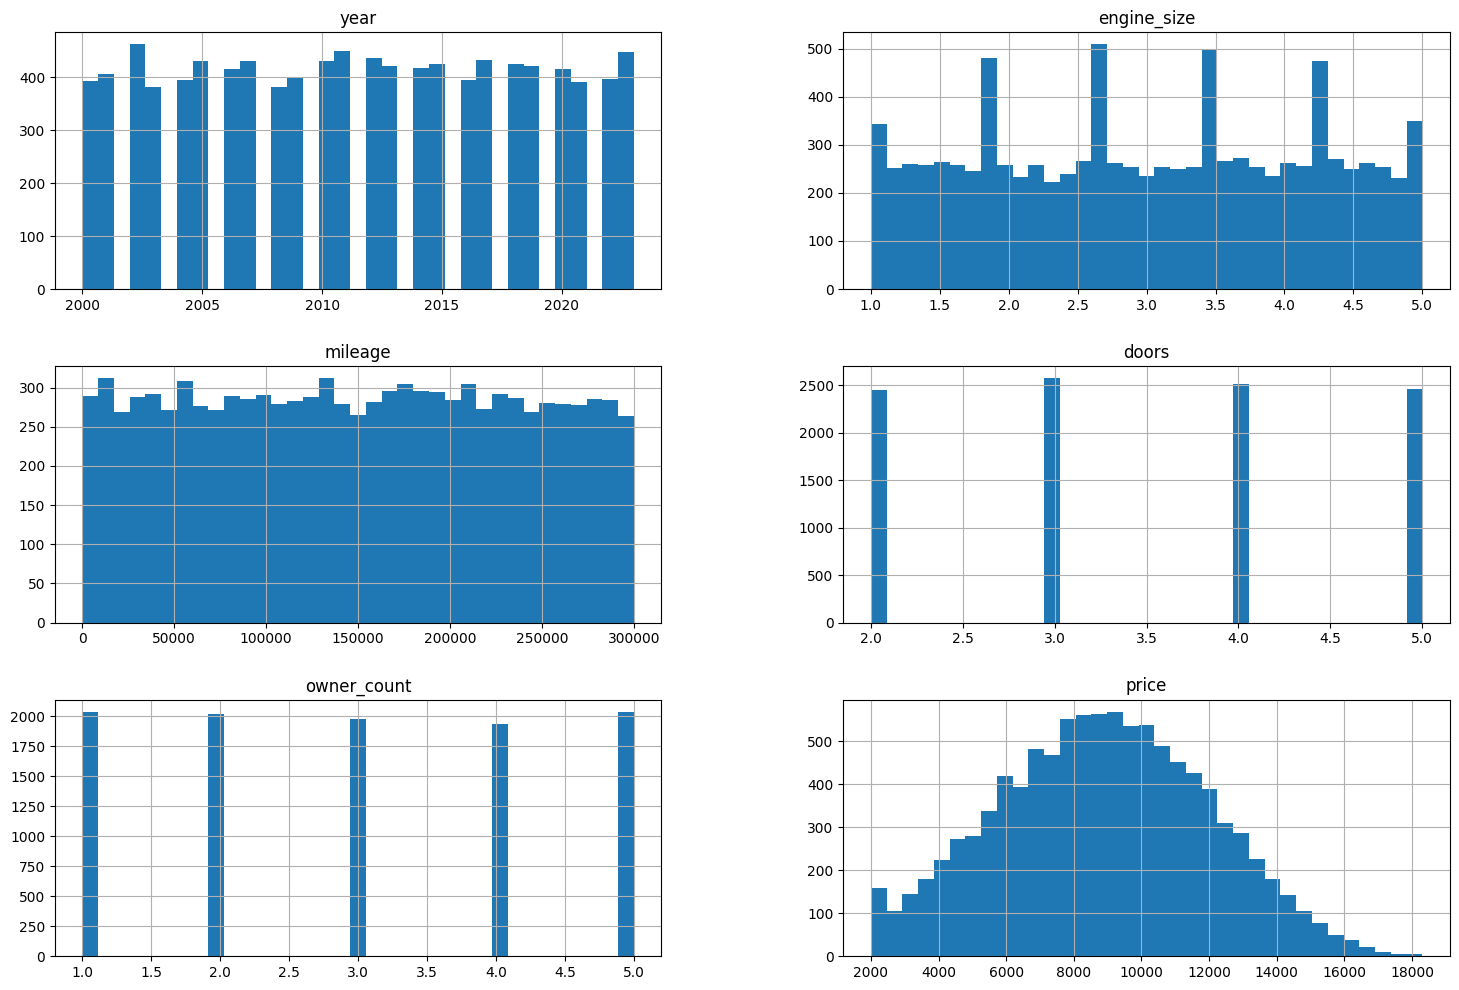

In [ ]:
df.hist(bins=35, figsize=[18, 12])
plt.show()

**Insight** from histogram:
1. `year` and `mileage` has evenly distributed data across all point.
2. `engine_size` has some spike at some point.
3. `doors` and `owner_count` only has < 6 type category. Indicating it **might be has nothing to do** with `price`.
4. `price` has a little spike at starting point. Indicating it is positive skewed distribution.

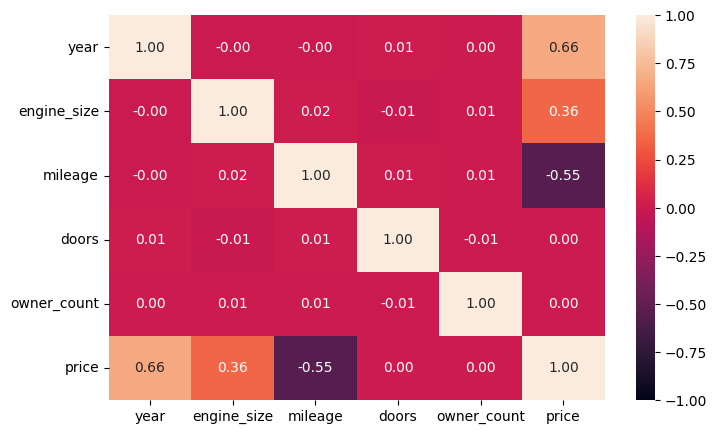

In [ ]:
plt.figure(figsize=[8, 5])
sns.heatmap(df.select_dtypes(exclude='object').corr(), fmt='.2f', annot=True, vmin=-1, vmax=1)
plt.show()

**Insight** from heatmap:
1. `doors` and `owner_count` has `0` correlation to price. Indicating it has **nothing to do** with `price`.
2. `year`, `engine_size`, and `mileage` has high correlation to price. Indicating it **might be the main columns that effect** the `price`.

In [ ]:
important_col = ['year', 'mileage', 'engine_size']

In [ ]:
def bar_obj_corr(cols, figsize=[10, 5]):
    plt.figure(figsize=figsize)
    corr = pd.get_dummies(df[[*cols, 'price']], columns=cols).corr().price
    corr = corr.drop('price')
    plt.barh(corr.index, corr)
    plt.xlabel('Correlation Score')
    plt.xticks(np.arange(-1, 1.2, 0.2))
    plt.grid()
    plt.title('Correlation Score to `price` Column')
    plt.show()

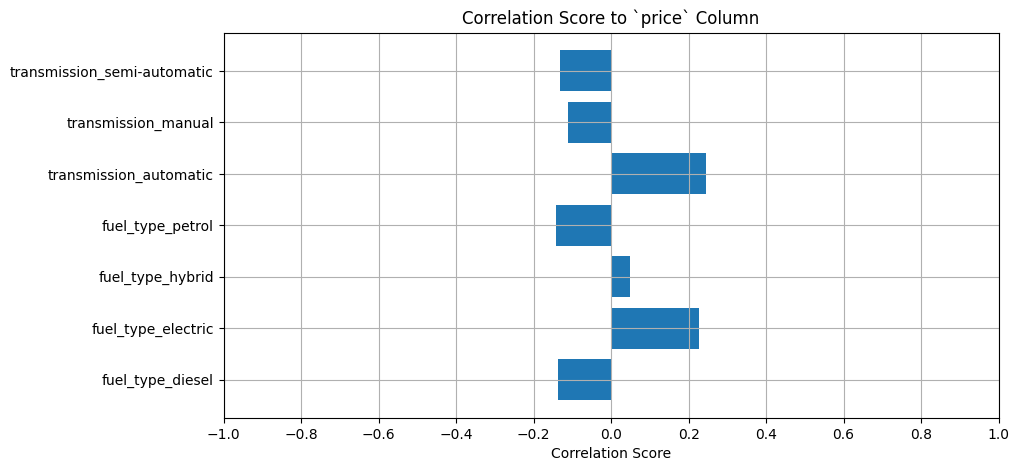

In [ ]:
bar_obj_corr(['fuel_type', 'transmission'])

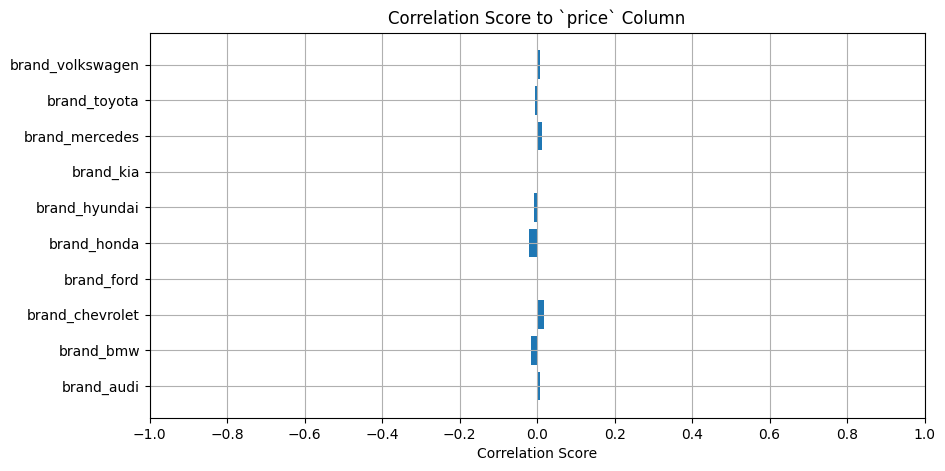

In [20]:
bar_obj_corr(['brand'])

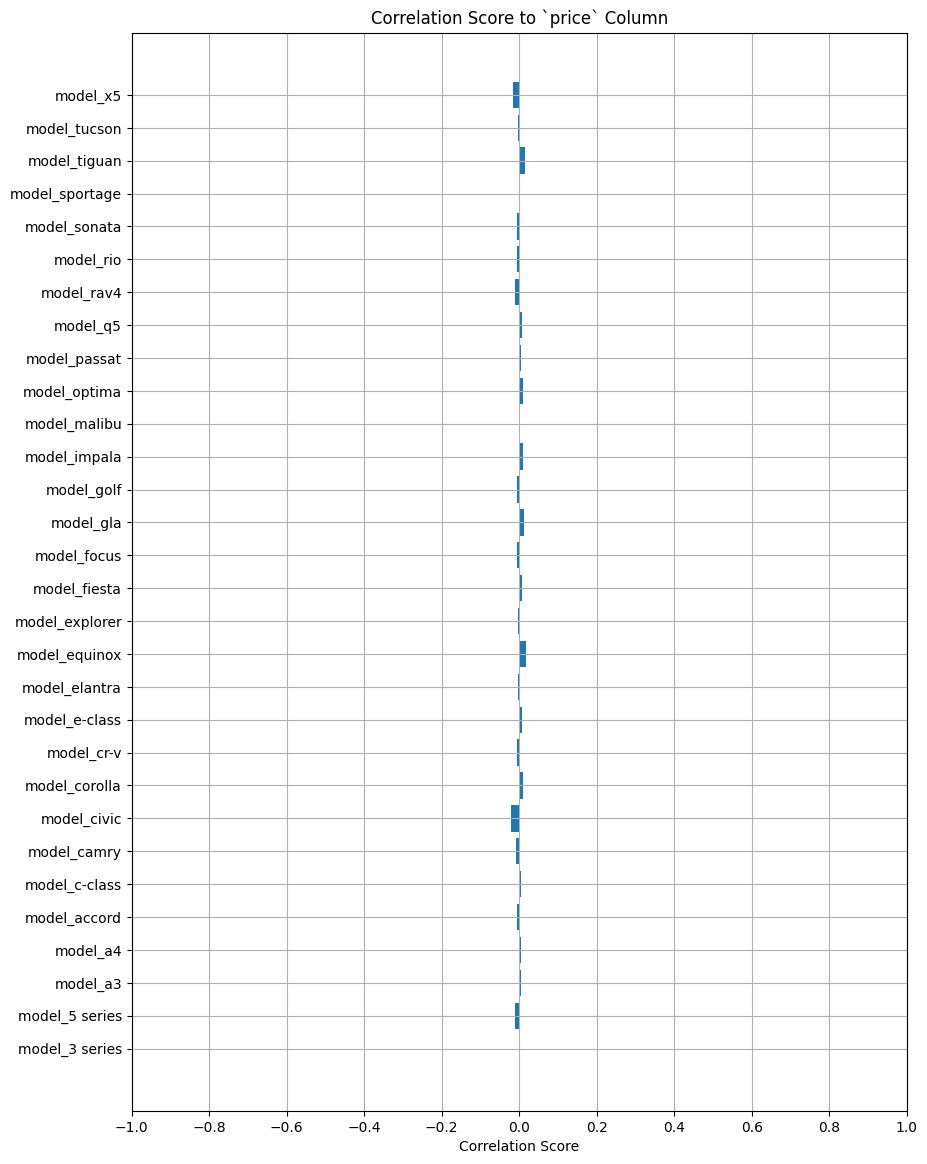

In [ ]:
bar_obj_corr(['model'], [10, 14])

**Insight** from correlation bar:
1. `fuel_type` and `transmission` has pretty high correlation. Indicating it **might be slightly effect** `price`.
2. `brand` and `model` has very low correlation. Indicating it might be has **nothing to do** with `price`.

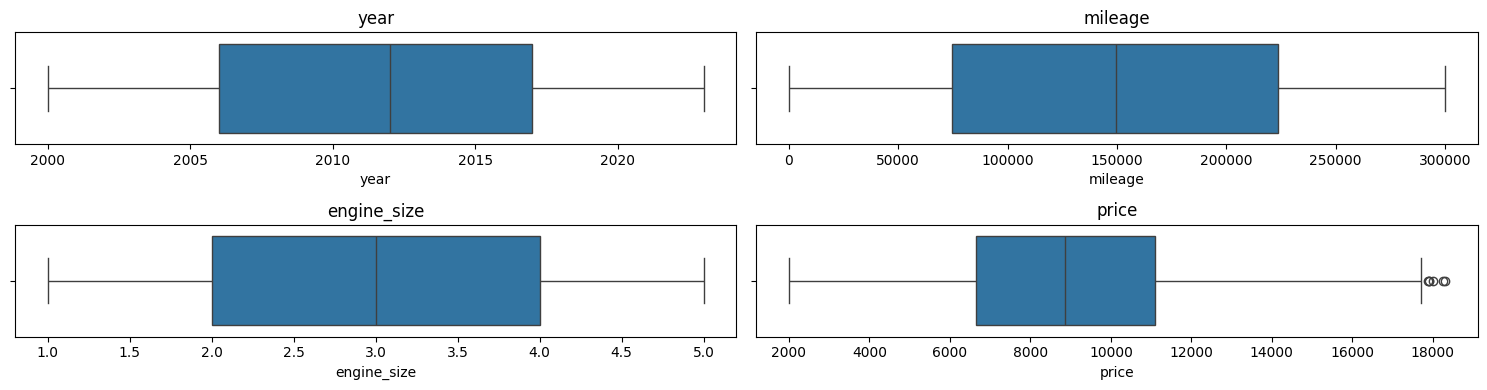

In [ ]:
plt.figure(figsize=[15, 4])

for idx, col in enumerate([*important_col, 'price']):
    ax = plt.subplot(2, 2, idx + 1)
    sns.boxplot(df[col], orient='y', ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

**Insight** from boxplot:
1. `year`, `mileage`, and `engine_size` has **no outlier**.
2. `price` has a little outlier, but it **might be a normal anomaly**.

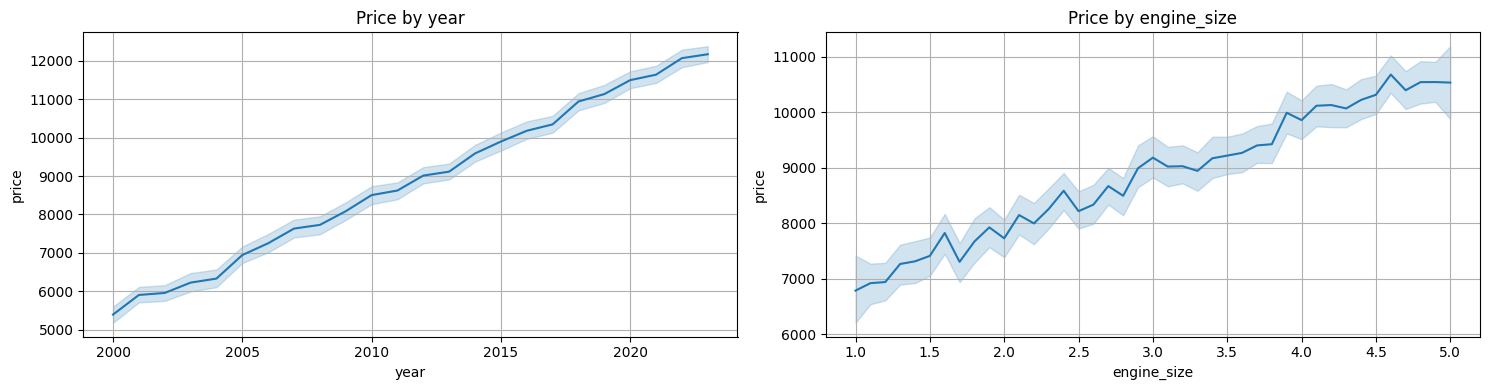

In [ ]:
plt.figure(figsize=[15, 4])

for idx, col in enumerate(['year', 'engine_size']):
    ax = plt.subplot(1, 2, idx + 1)
    sns.lineplot(df, x=col, y='price', ax=ax)
    ax.set_title(f'Price by {col}')
    ax.grid()

plt.tight_layout()
plt.show()

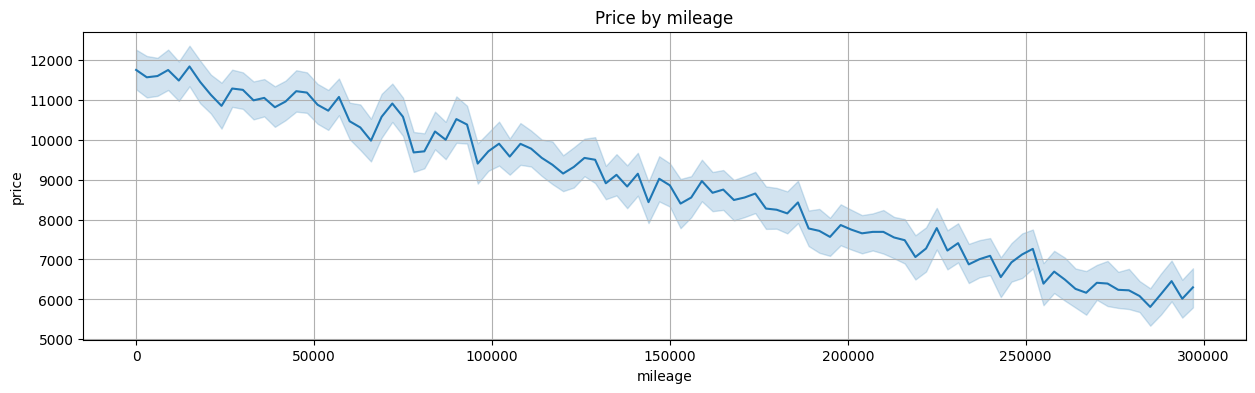

In [ ]:
plt.figure(figsize=[15, 4])
sns.lineplot(x=pd.cut(df.mileage, 100, labels=range(0, 300000, 3000)), y=df.price)
plt.grid()
plt.title('Price by mileage')
plt.show()

**Insight** from important columns lineplot:
1. `engine_size` and `mileage` has slightly unstable line.

In [ ]:
brand_list = df.brand.sort_values(ascending=True).unique()
brand_list

array(['audi', 'bmw', 'chevrolet', 'ford', 'honda', 'hyundai', 'kia',
       'mercedes', 'toyota', 'volkswagen'], dtype=object)

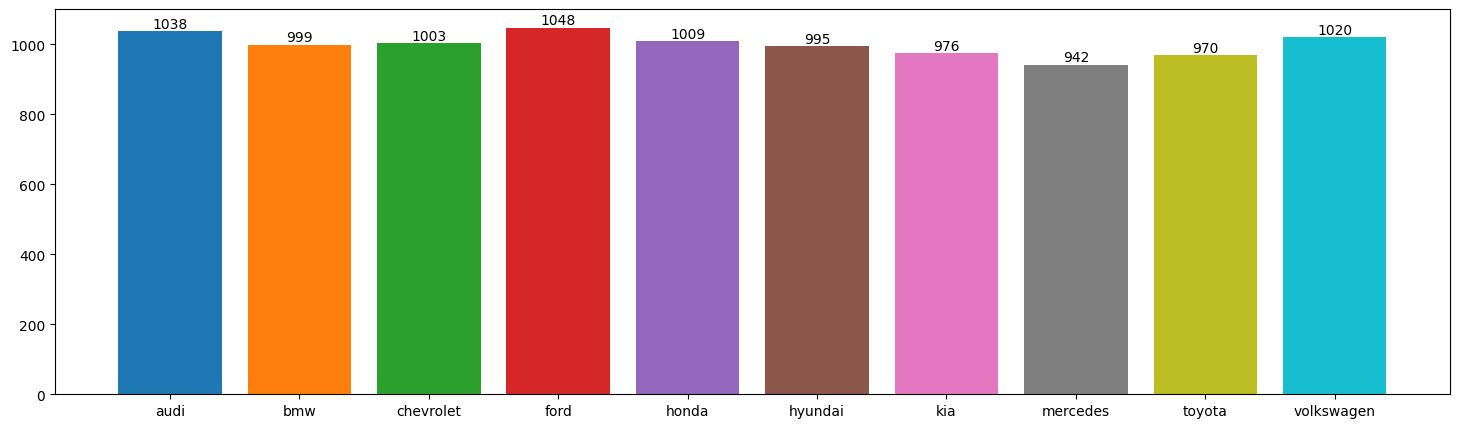

In [ ]:
plt.figure(figsize=[18, 5])

for brand in brand_list:
    count = len(df[df.brand == brand])
    plt.bar(brand, count)
    plt.text(brand, count, count, ha='center', va='bottom')

plt.show()

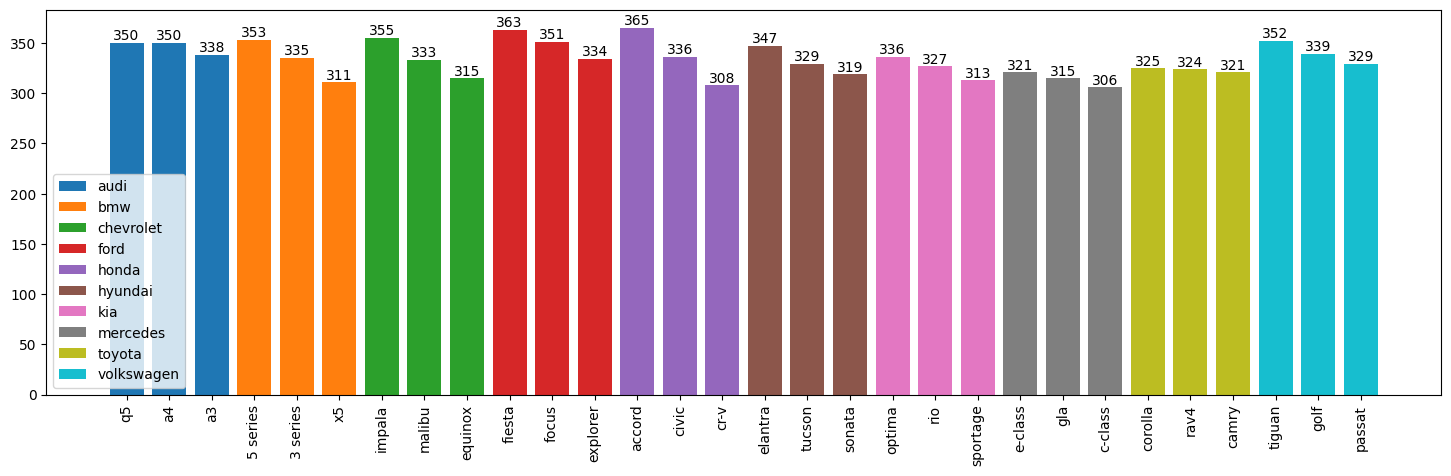

In [ ]:
plt.figure(figsize=[18, 5])

for brand in brand_list:
    model_counts = df[df.brand == brand].model.value_counts()
    plt.bar(model_counts.index, model_counts, label=brand)
    for model in model_counts.index:
        plt.text(model, model_counts[model], model_counts[model], ha='center', va='bottom')

plt.xticks(rotation=90)
plt.legend()
plt.show()

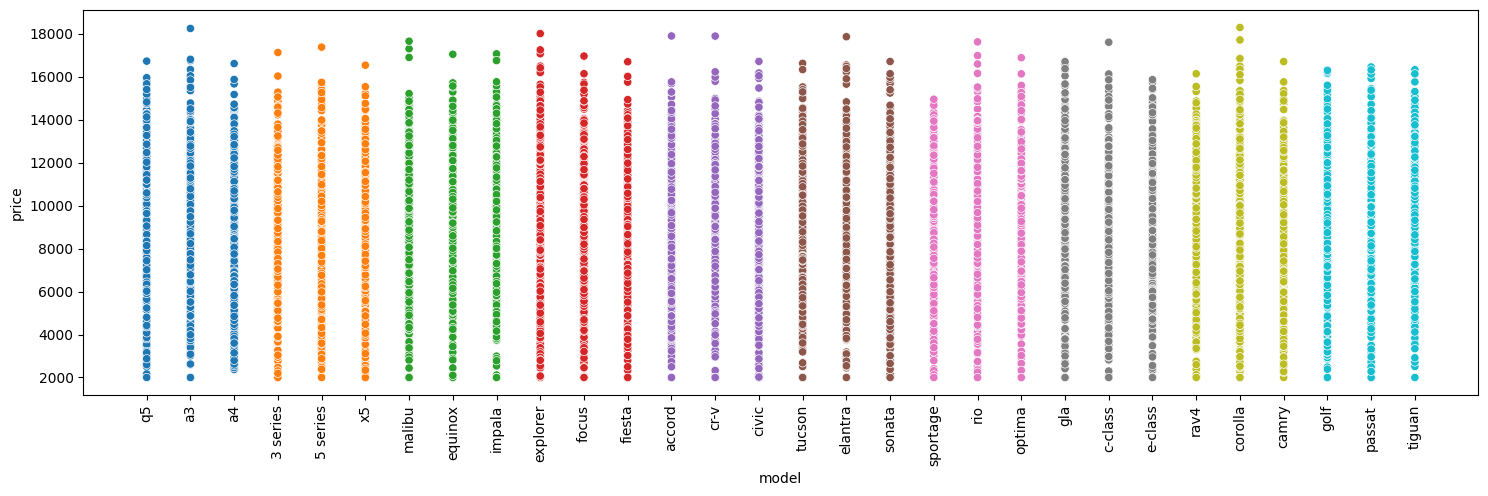

In [ ]:
plt.figure(figsize=[18, 5])
sns.scatterplot(df.sort_values('brand'), x='model', y='price', hue='brand', legend=False)
plt.xticks(rotation=90)
plt.show()

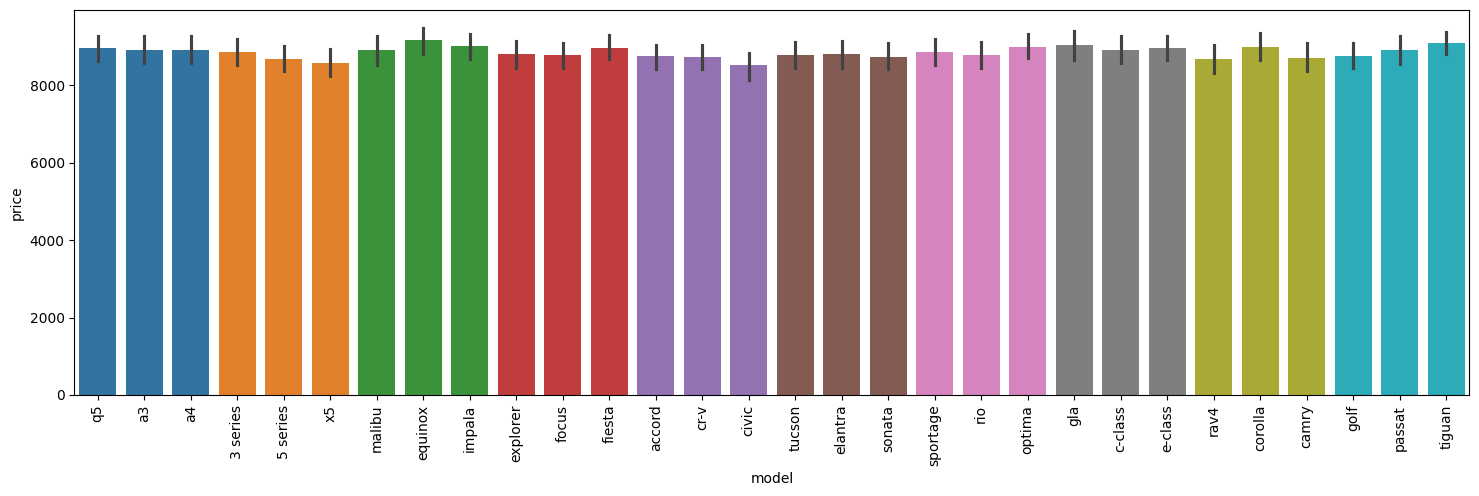

In [ ]:
plt.figure(figsize=[18, 5])
sns.barplot(df.sort_values('brand'), x='model', y='price', hue='brand', legend=False)
plt.xticks(rotation=90)
plt.show()

**Insight** from `brand` and `model` plot:
1. Each `brand` has pretty stable count.
2. Each `model` also has pretty stable count.
3. Each `model` has pretty stable `price`, distributed evenly across every `price`. Indicating `brand` and `model` has **nothing to do** with `price`.

In [30]:
def barh(col):
    _, ax = plt.subplots(1, 2, figsize=[15, 3])

    sns.countplot(df, y=col, ax=ax[0])
    ax[0].set_title('Count')
    ax[0].set_xlabel(None)
    ax[0].set_ylabel(None)
    ax[0].grid()

    sns.barplot(df, x='price', y=col, ax=ax[1])
    ax[1].set_title('Price Average')
    ax[1].invert_xaxis()
    ax[1].yaxis.tick_right()
    ax[1].yaxis.set_label_position("right")
    ax[1].set_xlabel(None)
    ax[1].set_ylabel(None)
    ax[1].grid()

    plt.suptitle(col)
    plt.tight_layout()
    plt.show()

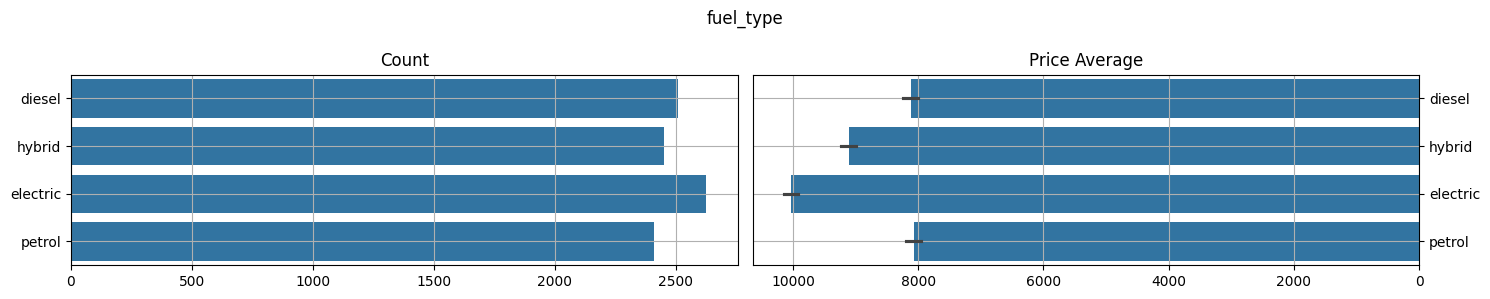

In [ ]:
barh('fuel_type')

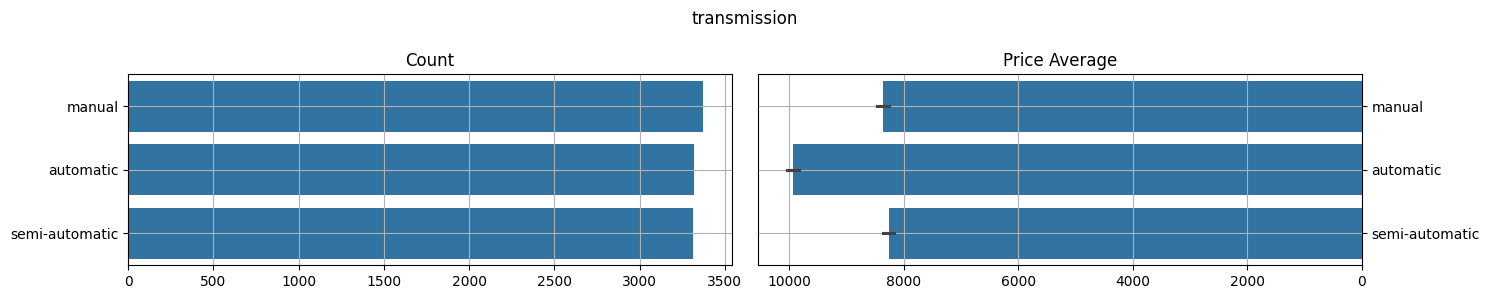

In [ ]:
barh('transmission')

**Insight** from `fuel_type` and `transmission` barplot:
1. Each `fuel_type` has pretty stable count.
2. Each `fuel_type` has unstable mean. Indicating it **might effect** `price`.
3. Each `transmission` has stable count.
4. Each `transmission` has unstable mean. Indicating it also **might effect** `price`.

### **2. Preprocessing**

Before we are going to make prediction model, we need to preprocess the dataset.

#### a. Dropping

We will drop unused columns, that has no effect to `price`.

In [ ]:
df_dropped = df.drop(columns=['brand', 'model', 'doors', 'owner_count'])
df_dropped

,year,engine_size,fuel_type,transmission,mileage,price
0,2020,4.2,diesel,manual,289944,8501
1,2012,2.0,hybrid,automatic,5356,12092
2,2020,4.2,diesel,automatic,231440,11171
3,2023,2.0,electric,manual,160971,11780
4,2003,2.6,hybrid,semi-automatic,286618,2867
...,...,...,...,...,...,...
9995,2004,3.7,diesel,semi-automatic,5794,8884
9996,2002,1.4,electric,automatic,168000,6240
9997,2010,3.0,petrol,automatic,86664,9866
9998,2002,1.4,hybrid,automatic,225772,4084


#### b. Encoding

We need to encode columns that we will use later for prediction.

In [ ]:
df_encoded = pd.get_dummies(df_dropped, columns=['fuel_type', 'transmission'])
df_encoded

,year,engine_size,mileage,price,fuel_type_diesel,fuel_type_electric,fuel_type_hybrid,fuel_type_petrol,transmission_automatic,transmission_manual,transmission_semi-automatic
0,2020,4.2,289944,8501,True,False,False,False,False,True,False
1,2012,2.0,5356,12092,False,False,True,False,True,False,False
2,2020,4.2,231440,11171,True,False,False,False,True,False,False
3,2023,2.0,160971,11780,False,True,False,False,False,True,False
4,2003,2.6,286618,2867,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,5794,8884,True,False,False,False,False,False,True
9996,2002,1.4,168000,6240,False,True,False,False,True,False,False
9997,2010,3.0,86664,9866,False,False,False,True,True,False,False
9998,2002,1.4,225772,4084,False,False,True,False,True,False,False


## **D. Modelling**

It's time to build a machine learning model using scikit-learn.

### **1. Function and Variable Definition**

In [ ]:
df_final = df_encoded.drop(columns='price')

In [ ]:
# from `[[num], [num]]` to `[num, num]`
to_num_array = lambda price: np.array(list(map(lambda x: x[0], price)))
# from `0.12345...` to `0.123`, depends on `n`
trunc = lambda f, n=3: round(f * 10 ** n) / 10 ** n

In [ ]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X        = scaler_x.fit_transform(df_final)
y        = scaler_y.fit_transform(df[['price']])
mean     = df.price.mean()

In [ ]:
model_stats = {}

def train(X, model, model_name):
    # scaling & splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

    # testing
    model.fit(X_train, to_num_array(y_train))
    y_pred     = model.predict(X_test)
    y_test_ori = to_num_array(scaler_y.inverse_transform(y_test))
    y_pred_ori = to_num_array(scaler_y.inverse_transform(y_pred.reshape(-1, 1)))

    # calculate error metrics
    mae  = mean_absolute_error(y_test_ori, y_pred_ori)
    mse  = mean_squared_error(y_test_ori, y_pred_ori)
    maep = mae / mean * 100
    rmse = np.sqrt(mse)
    r2   = r2_score(y_test_ori, y_pred_ori)

    # add model stats to be compare later
    model_stats[model_name] = {
        'MAE'   : trunc(mae),
        'MAE %' : trunc(maep),
        'MSE'   : trunc(mse),
        'RMSE'  : trunc(rmse),
        'R2 %'  : trunc(r2 * 100)
    }

    # display calculated metrics
    print(f'MAE score: {mae:.3f}')
    print(f'MAE percentage: {maep:.3f}%')
    print(f'\nMSE score: {mse:.3f}')
    print(f'MSE percentage: {mse / mean * 100:.3f}%')
    print(f'\nRMSE score: {rmse:.3f}')
    print(f'RMSE percentage: {rmse / mean * 100:.3f}%')
    print(f'\nR2 score: {r2 * 100:.3f}%')

    # visualize residual score
    _, ax = plt.subplots(1, 2, figsize=[18, 6])
    plt.title('Residual Plot')
    residual = y_test_ori - y_pred_ori

    # each residual score
    sns.scatterplot(x=y_test_ori, y=y_pred_ori, ax=ax[0])
    ax[0].plot(y_test_ori, y_test_ori, label='Actual', color='orange')
    ax[0].set_title('Actual vs Prediction')
    ax[0].set_xlabel('Actual')
    ax[0].set_ylabel('Prediction')
    ax[0].legend()
    ax[0].grid()

    # residual frequency distribution (limit to only 50 each bin)
    sns.histplot(residual, bins = int(np.ceil((residual.max() - residual.min()) / 50)), ax=ax[1])
    ax[1].set_title('Residual Frequency')
    ax[1].set_xlabel('Residual')
    ax[1].set_ylabel('Frequency')
    ax[1].grid()
    plt.show()

    # visualize actual vs prediction value
    plt.figure(figsize=[18, 6])
    sns.scatterplot(x=y_test_ori, y=residual)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.title('Residual Score')
    plt.xlabel('Price')
    plt.ylabel('Residual')
    plt.grid()
    plt.show()

    return model

### **2. Training**

#### 1) Linear Regression

MAE score: 19.385
MAE percentage: 0.219%

MSE score: 4168.446
MSE percentage: 47.085%

RMSE score: 64.564
RMSE percentage: 0.729%

R2 score: 99.955%


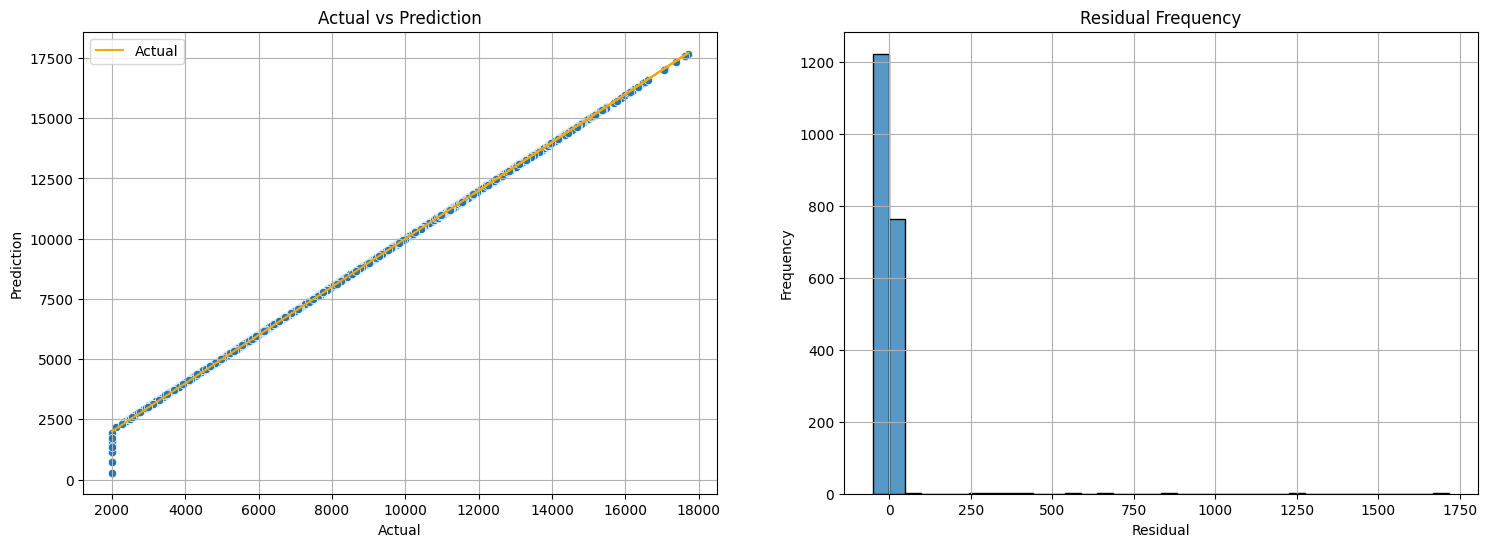

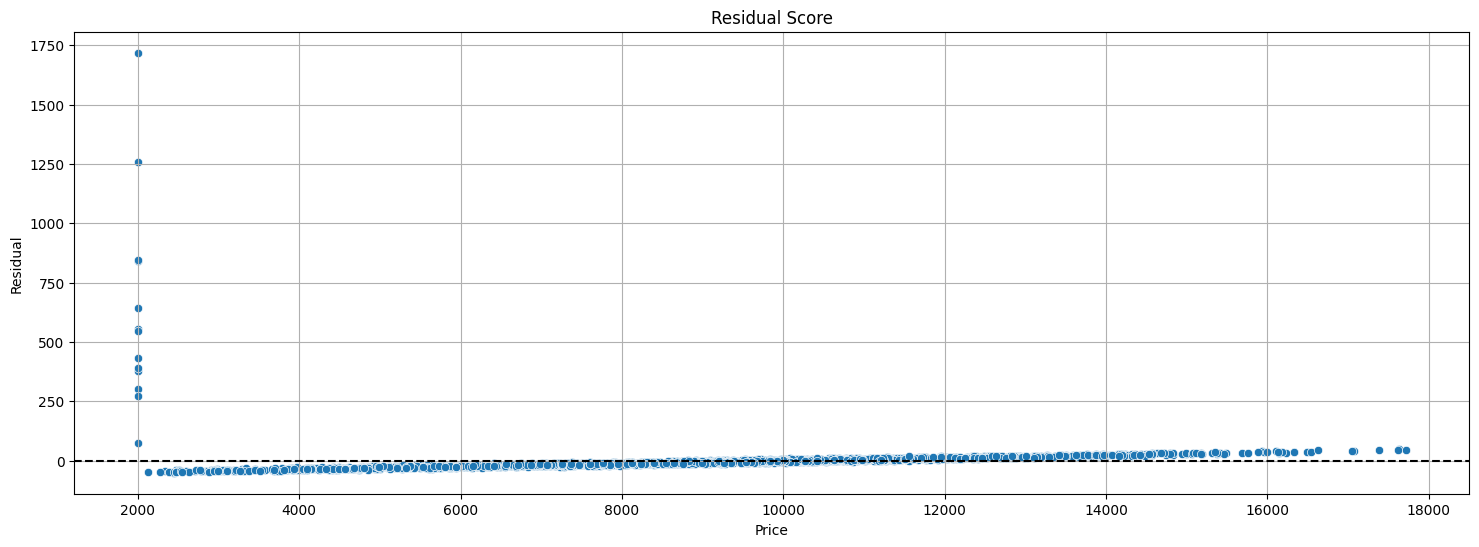

In [ ]:
model1 = train(X, LinearRegression(), 'LR')

#### 2) Linear Regression - Important Columns Only

MAE score: 888.983
MAE percentage: 10.042%

MSE score: 1137718.102
MSE percentage: 12851.267%

RMSE score: 1066.639
RMSE percentage: 12.048%

R2 score: 87.617%


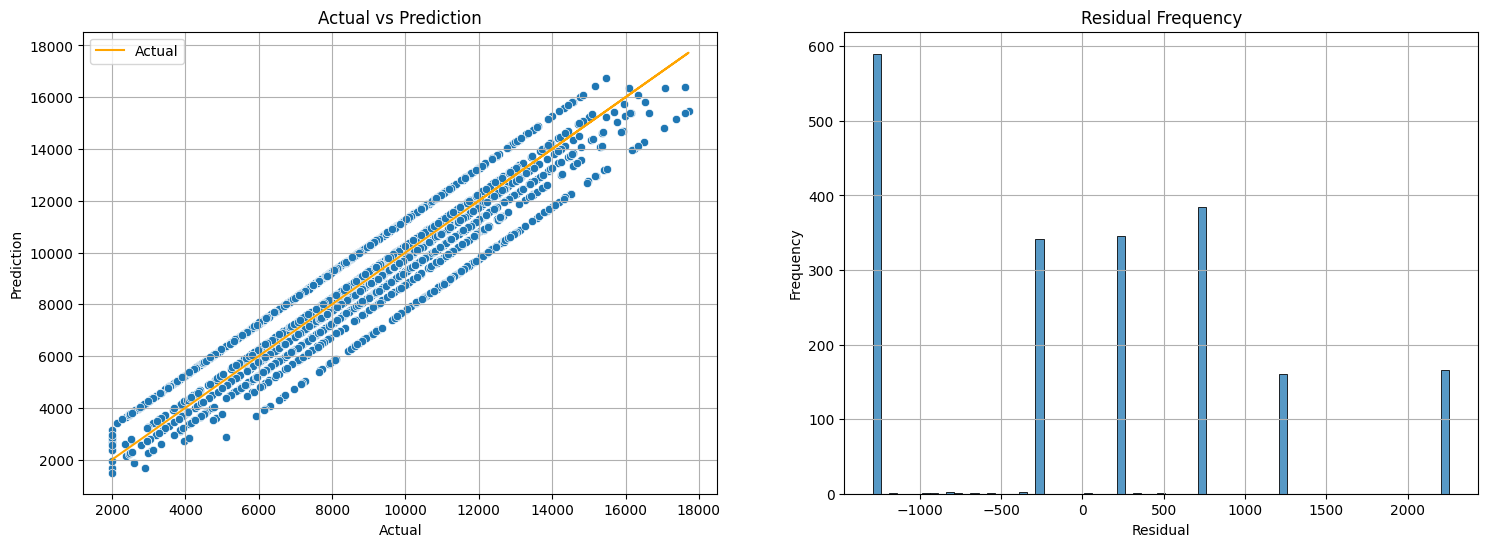

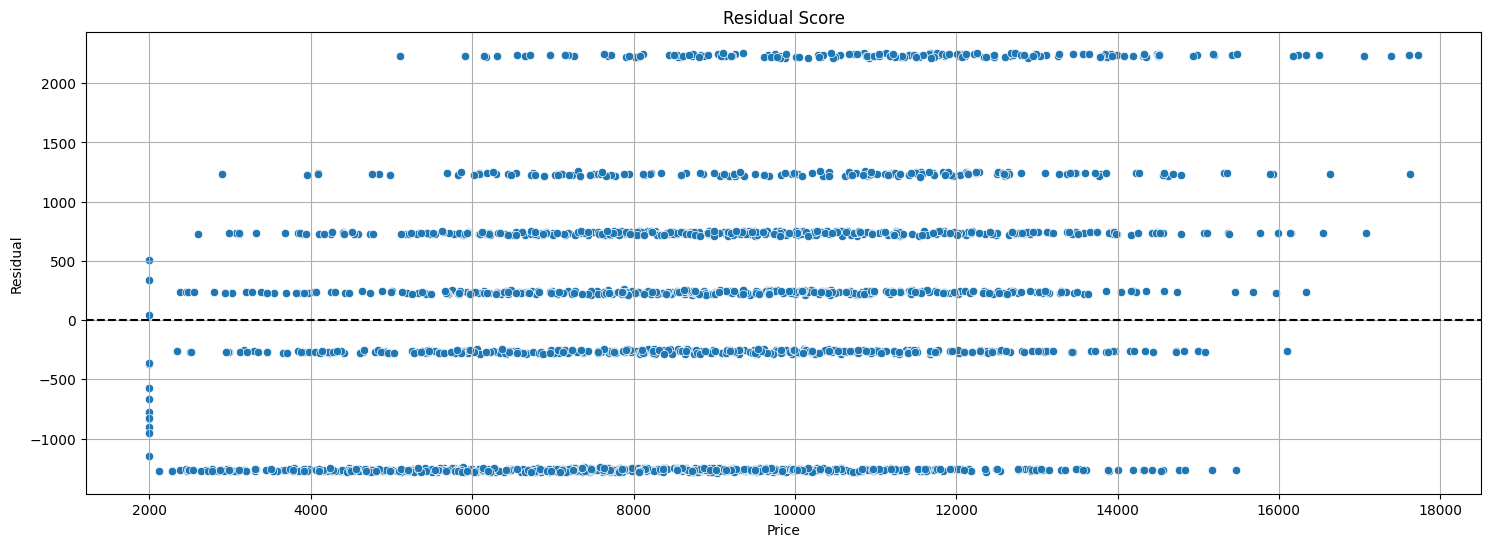

In [ ]:
scaler_x2 = StandardScaler()
model2    = train(scaler_x2.fit_transform(df_final[important_col]), LinearRegression(), 'LR-2')

#### 3) Desicion Tree

MAE score: 418.167
MAE percentage: 4.723%

MSE score: 294343.377
MSE percentage: 3324.800%

RMSE score: 542.534
RMSE percentage: 6.128%

R2 score: 96.796%


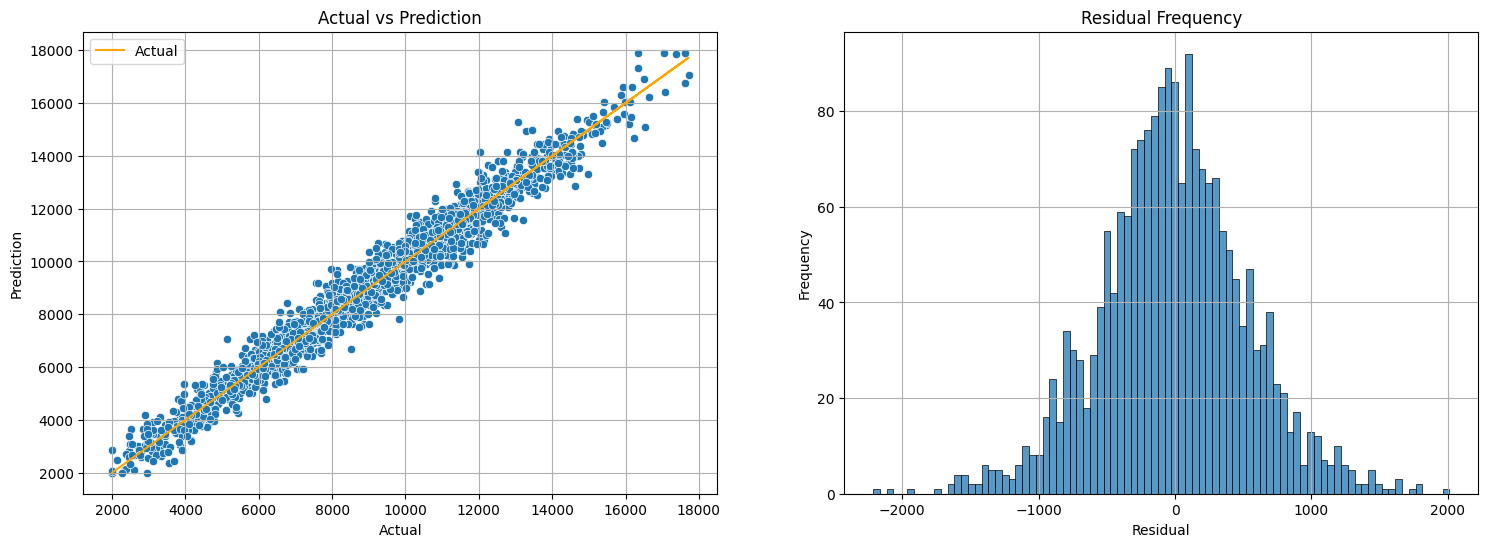

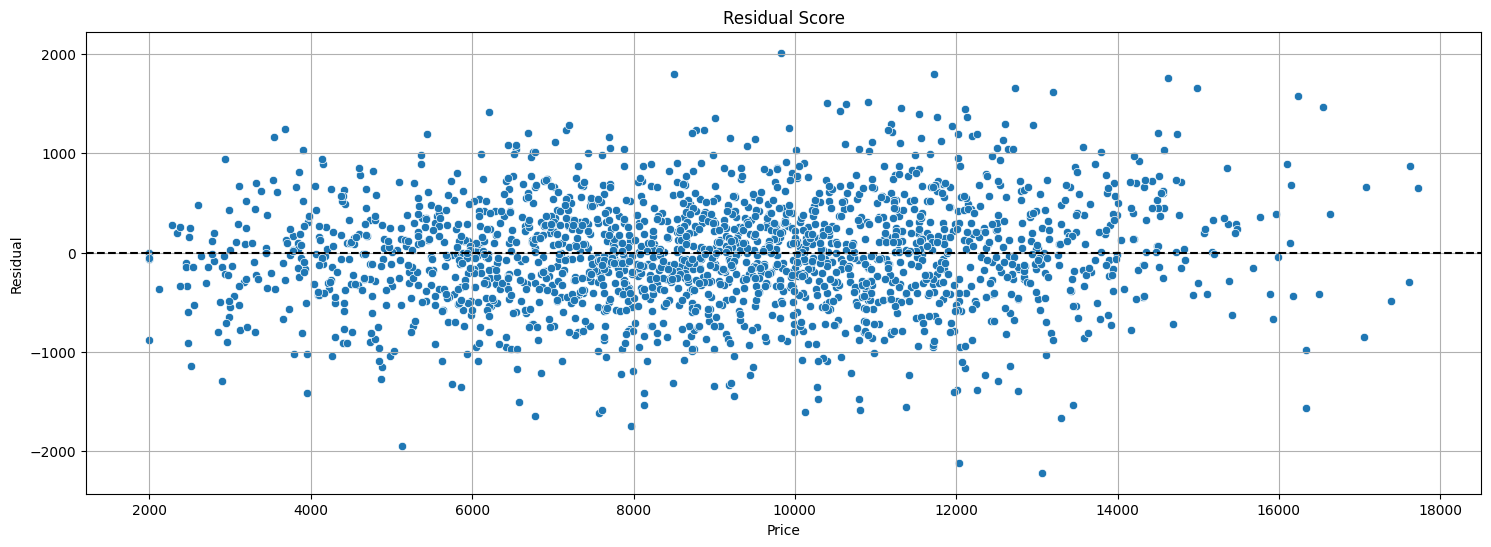

In [ ]:
model3 = train(X, DecisionTreeRegressor(), 'DT')

#### 4) Random Forest

MAE score: 213.082
MAE percentage: 2.407%

MSE score: 76310.606
MSE percentage: 861.978%

RMSE score: 276.244
RMSE percentage: 3.120%

R2 score: 99.169%


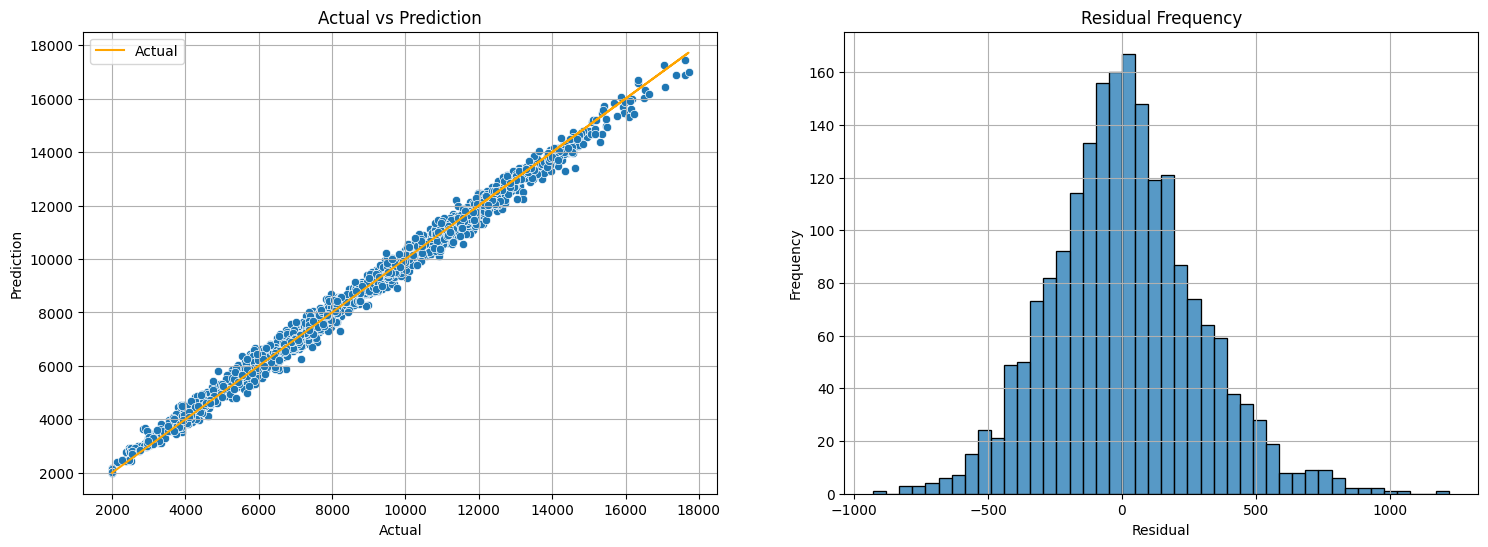

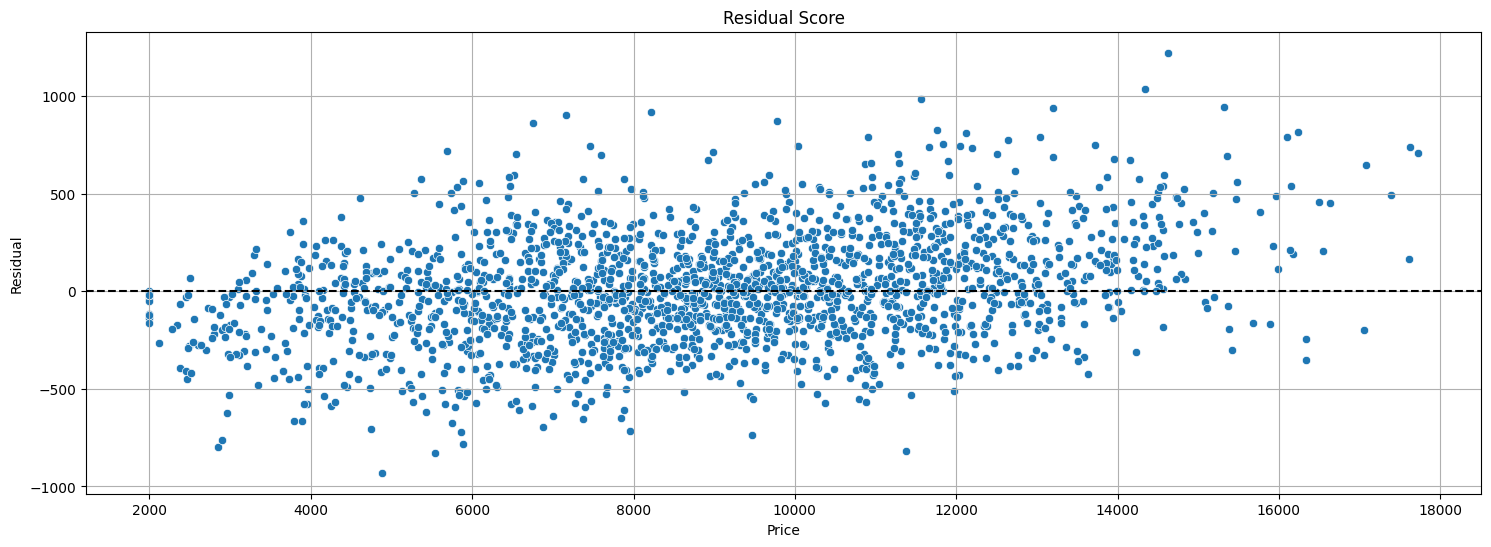

In [ ]:
model4 = train(X, RandomForestRegressor(), 'RF')

#### 5) Support Vector Machine

MAE score: 124.658
MAE percentage: 1.408%

MSE score: 23453.053
MSE percentage: 264.918%

RMSE score: 153.144
RMSE percentage: 1.730%

R2 score: 99.745%


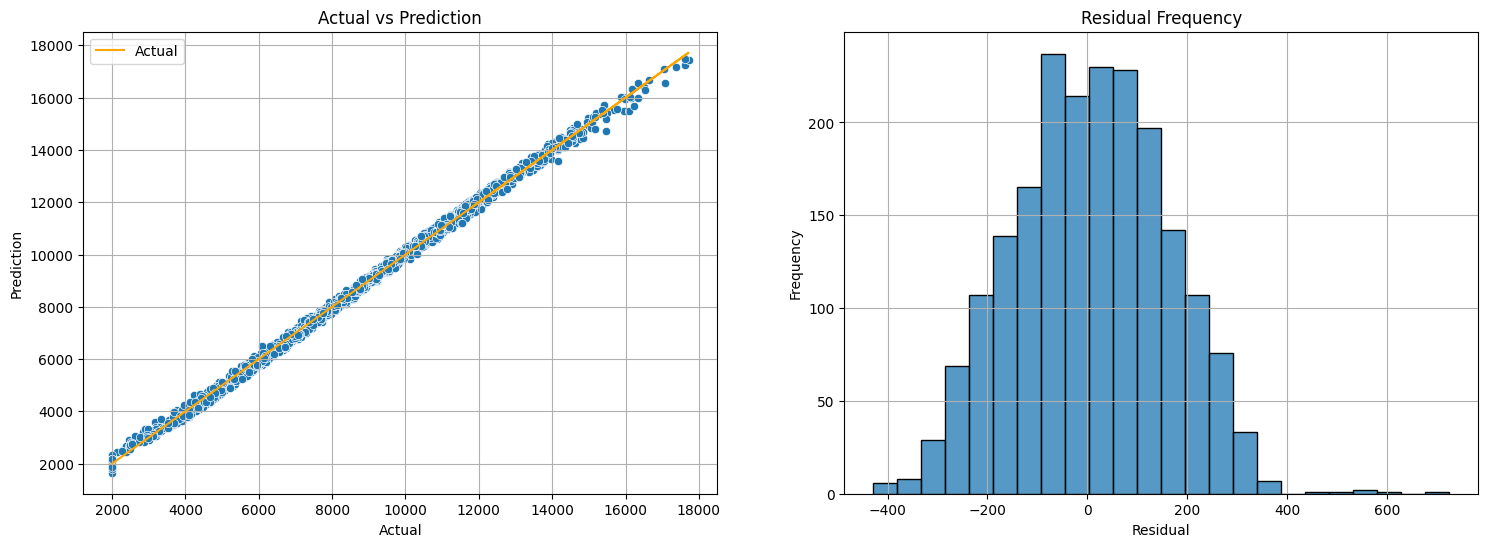

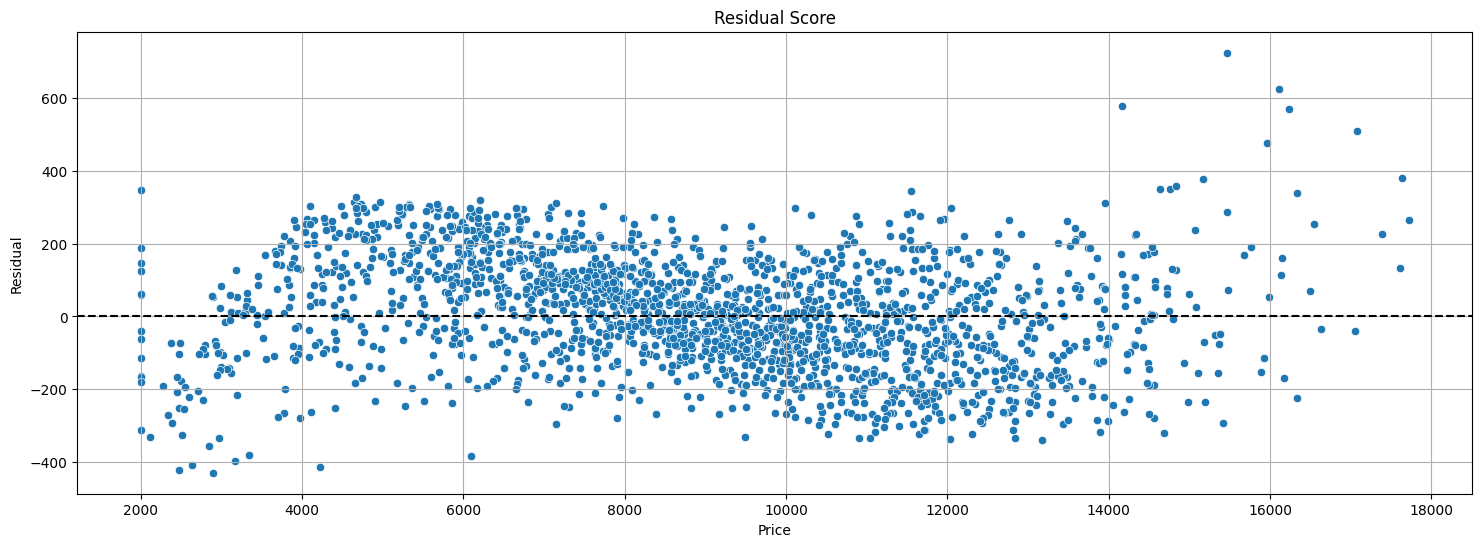

In [ ]:
model5 = train(X, SVR(), 'SVR')

#### 6) Gradient Boost

MAE score: 169.548
MAE percentage: 1.915%

MSE score: 46943.369
MSE percentage: 530.256%

RMSE score: 216.664
RMSE percentage: 2.447%

R2 score: 99.489%


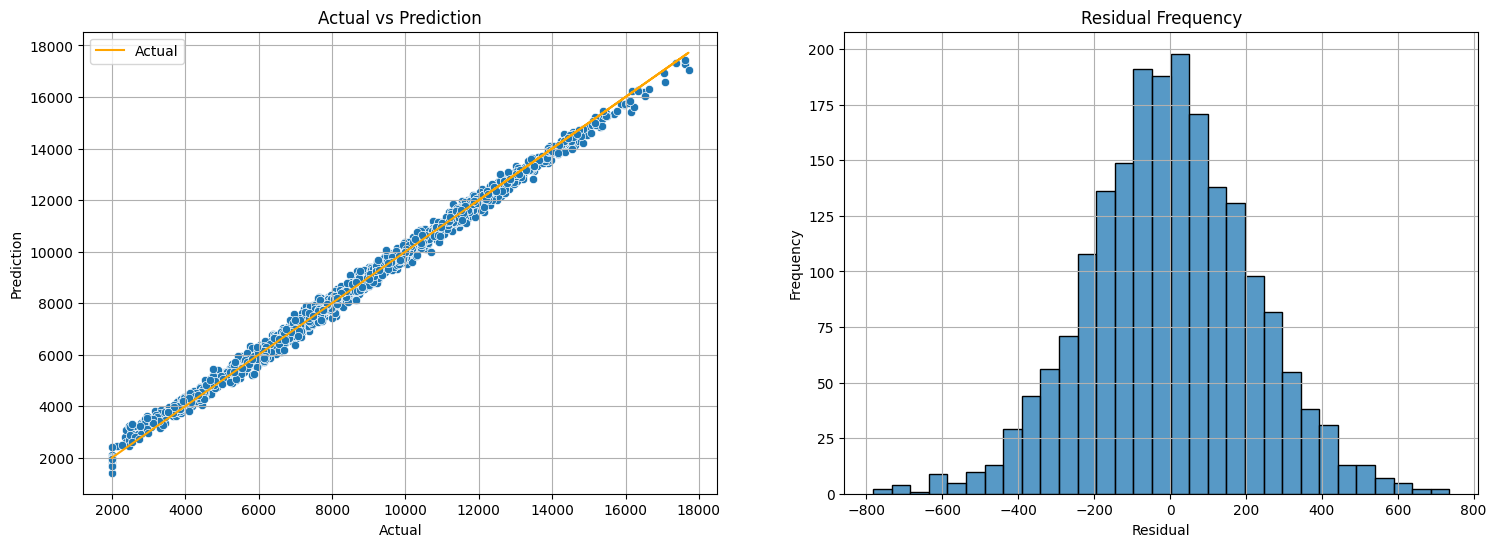

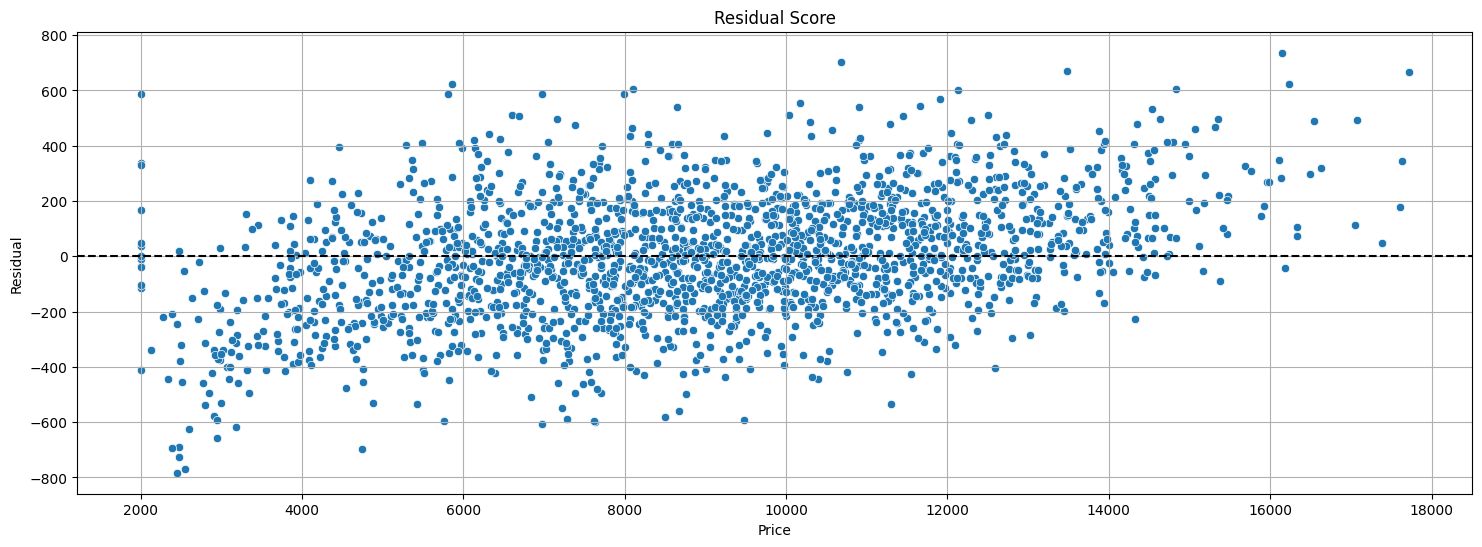

In [ ]:
model6 = train(X, GradientBoostingRegressor(), 'GB')

#### 7) XGBoost

MAE score: 168.758
MAE percentage: 1.906%

MSE score: 47246.280
MSE percentage: 533.678%

RMSE score: 217.362
RMSE percentage: 2.455%

R2 score: 99.486%


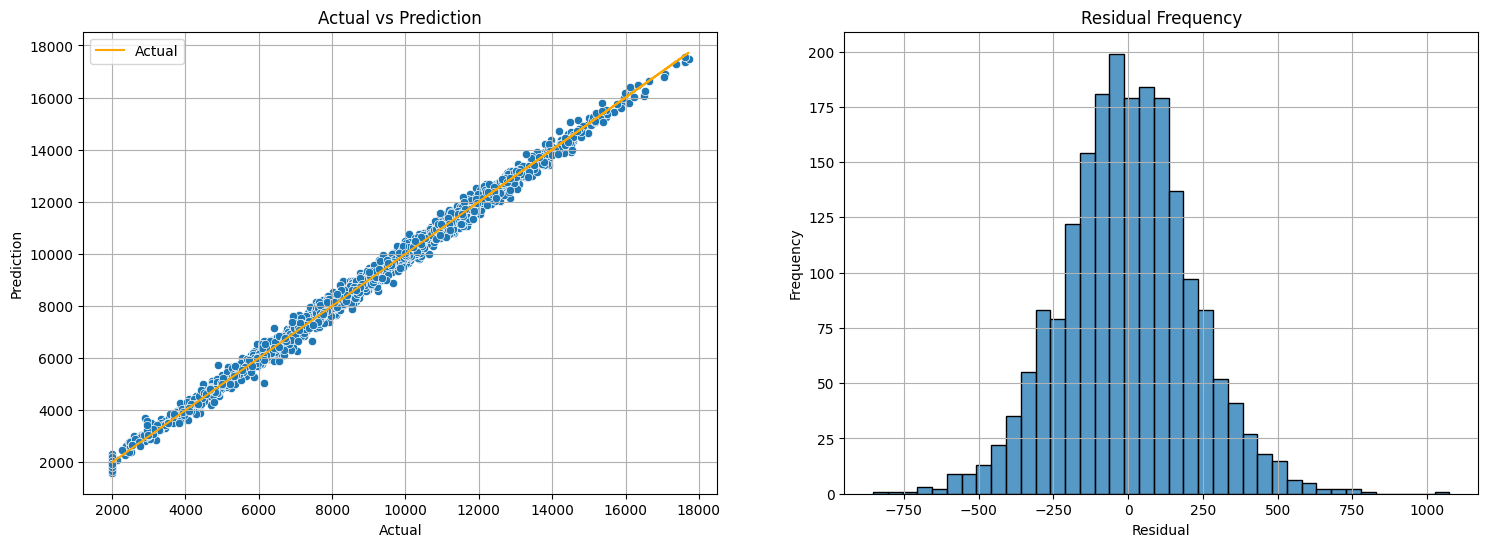

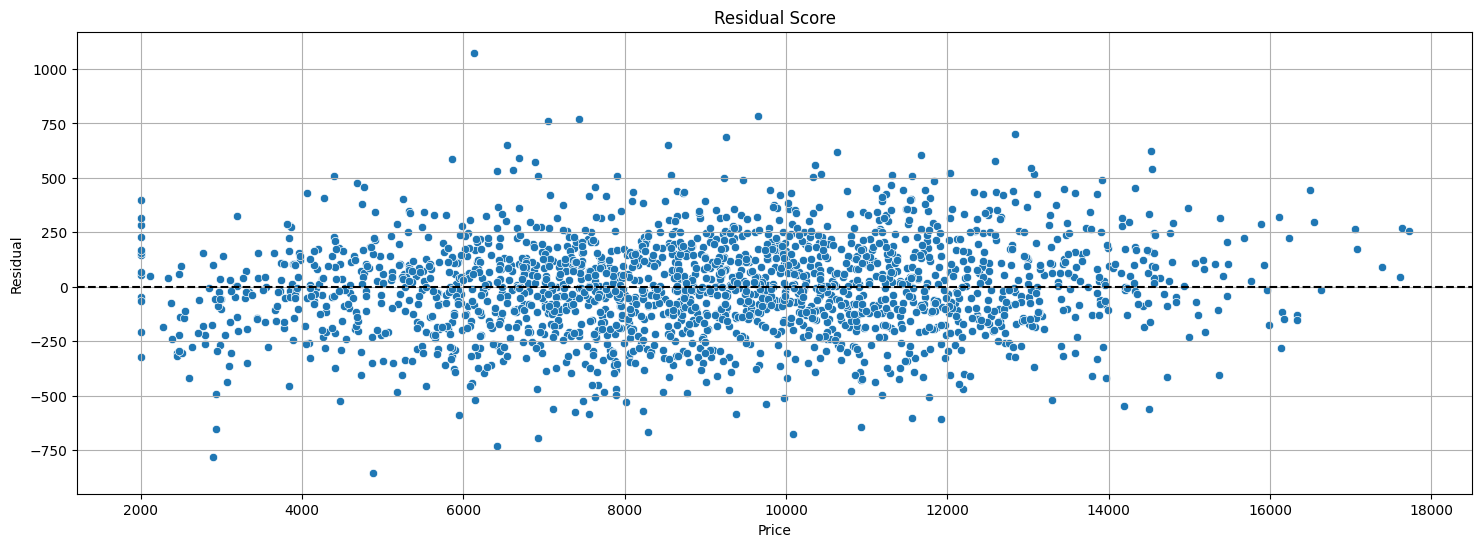

In [ ]:
model7 = train(X, XGBRegressor(), 'XGB')

## **E. Conclusion**

### **1. Evaluation**

After build a model, we will evaluate and compare each model performance.

In [ ]:
df_model_stats = pd.DataFrame(model_stats).transpose()

In [ ]:
df_model_stats

,MAE,MAE %,MSE,RMSE,R2 %
LR,19.385,0.219,4168.446,64.564,99.955
LR-2,888.983,10.042,1137718.102,1066.639,87.617
DT,418.167,4.723,294343.377,542.534,96.796
RF,213.082,2.407,76310.606,276.244,99.169
SVR,124.658,1.408,23453.053,153.144,99.745
GB,169.548,1.915,46943.369,216.664,99.489
XGB,168.758,1.906,47246.280,217.362,99.486


After compared all model performance to predict this dataset, **Linear Regression** is the **best** model of all tested model. It has the lowest MAE score of `19.39`, which is only `0.22%` from MEAN. It also manage to got almost a perfect R2 score, which is `99.96%`. It because a car price has a linear relation across all columns. Unfortunately, this model cannot predict a car price minimum is `2,000`. Overall, this model got the best score in all aspect from all model tested.

Interestingly, **Random Forest** and **Decision Tree** model can handle a car price minimum is `2,000`. It because this model use a decision process to determine the result. Unfortunately it has the **worst** model performance of all tested model. Eventually, if you want to handle a low car price, **Random Forest** might be a better choice.

Finally, **Decision Tree** has the **worst** performance of all tested model. It has the highest MAE score of `418.17`, which is `4.72%` from MEAN. It also has the lowest R2 score, which is `96.8%`. Beside its ability to be able to predict a car price minimum is `2,000`, you maybe want to choose **Random Forest** instead.

### **2. Saving Model**

We will only save 2 model. The best model, which is **Linear Regression**, and the model that can handle a car price minimum, which is **Random Forest**.

In [ ]:
os.makedirs('models', exist_ok=True)
os.makedirs('scalers', exist_ok=True)

In [ ]:
def save(obj, type, name):
    with open(f'{type}s/{type}-{name}.pkl', 'wb') as file:
        pkl.dump(obj, file)

In [ ]:
save(scaler_x, 'scaler', 'x')
save(model1, 'model', 'lr')
save(model4, 'model', 'rf')